# Development of MDL encoding for real numbers

In [1]:
import capnp
import codecs
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import statistics

capnp.remove_import_hook()
interface_capnp = capnp.load("../cpp-tool/capnproto/interface.capnp", imports=["/usr/local/include"])

kj/filesystem-disk-unix.c++:1690: warning: PWD environment variable doesn't match current directory; pwd = /root/.vscode-server/bin/e8a3071ea4344d9d48ef8a4df2c097372b0c5161


In [2]:
client = capnp.TwoPartyClient("cpp-tool:21654")
processDataUpdates = client.bootstrap().cast_as(interface_capnp.ProcessDataUpdates)

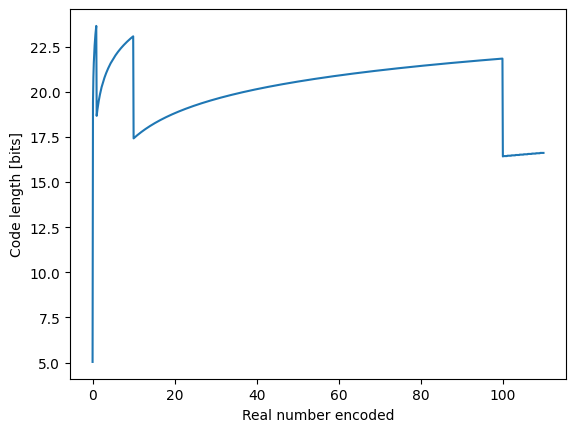

In [3]:
numbers = []
codeLengths = []
for num in [x / 10.0 for x in range(0, 1100)]:
    codeLength = processDataUpdates.encodeRealNumber(realNumber=num, precision=3).wait().codeLength
    numbers.append(num)
    codeLengths.append(codeLength)

plt.plot(numbers, codeLengths)
plt.xlabel("Real number encoded")
plt.ylabel("Code length [bits]")
plt.show()

It is surprising and counterintuitive to see that larger numbers many times have a significantly smaller encoding length.